In [1]:
import pandas as pd

def calc(filepath):
    res = []
    i = 1
    while True:
        try:
            X = pd.read_csv(filepath + "data%d.csv"%i)
            try: #try to convert numerical marker to int, if marker not an number ignore the exception
                X = X.astype({'marker': int})
            except ValueError:
                pass
            res.insert(len(res), (X.marker.value_counts()).to_frame(name=str(i)).T)
            i+=1
        except FileNotFoundError: #if no more files found end the while 
            return pd.concat(res)
            break

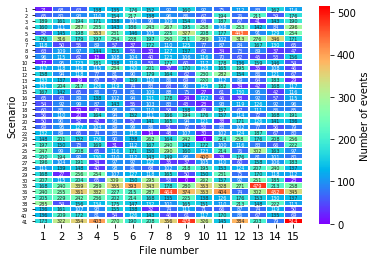

In [30]:
X = calc("C:/Users/bhadr/Documents/Programming/Stage2020/multiclass/")

import seaborn as sn
import numpy as np
#print(X.T.to_latex())
X = X.replace(np.nan, 0)
ax = sn.heatmap(X.T, linewidths=.5, cmap='rainbow', annot=True, fmt = 'g' ,annot_kws={"size": 5}, yticklabels=1, cbar_kws={'label': 'Number of events'})
ax.set_xlabel("File number")
ax.set_ylabel("Scenario")
ax.tick_params(axis = 'y', labelsize = 5)

from matplotlib import pyplot as plt
f = ax.get_figure()
f.savefig("thesis/images/distr_allscen.pdf")

In [31]:
X = calc("C:/Users/bhadr/Documents/Programming/Stage2020/Data/")

In [37]:
X['Attack'].values

array([3866, 3525, 3811, 3402, 3680, 3490, 3910, 3771, 3570, 3921, 3969,
       3453, 4118, 3762, 3415], dtype=int64)

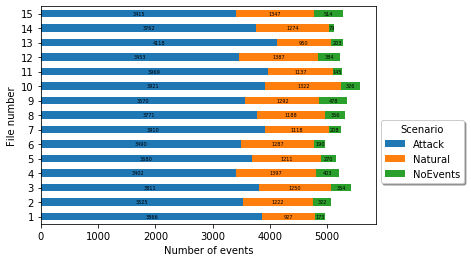

In [71]:
from matplotlib import pyplot as plt
ax = X.plot(kind='barh', rot = 0, stacked = True)
ax.set_ylabel("File number")
ax.set_xlabel("Number of events")
ax.legend(loc='left center', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = "Scenario")
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
    label_text = f'{width:.0f}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + width -width/2# adjust 0.2 to center the label
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=5)
f = ax.get_figure()
f.savefig("thesis/images/distr_3classes.pdf", bbox_inches='tight')

In [37]:
Y = calc("C:/Users/bhadr/Documents/Programming/Stage2020/multiclass/")

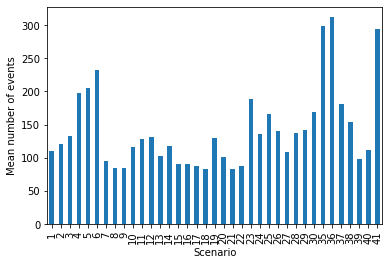

In [28]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages("thesis/images/distr_allscen.pdf") as pdf:
    ax = Y.mean().plot(kind="bar")
    ax.set_xlabel("Scenario")
    ax.set_ylabel("Mean number of events")
    pdf.savefig()

In [80]:
print(Y.mean().std())
print(X.mean().std())

61.161303335016356
1767.1959576098495


In [64]:
X.sum(1).to_frame(name="total")

,total
1,4966
2,5069
3,5415
4,5202
5,5161
6,4967
7,5236
8,5315
9,5340
10,5569


In [52]:
#covert arff to csv
for i in range(1,16):
    from scipy.io import arff
    X = arff.loadarff("multiclass/data%d Sampled Scenarios.csv.arff"%i)
    X = pd.DataFrame(X[0], dtype='float64')
    X.to_csv("multiclass/data%i.csv"%i)